In [1]:
!pip install fbprophet

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fbprophet import Prophet
%matplotlib inline

In [22]:
RawData = pd.read_excel('CapiData.xlsx')

In [23]:
RawData.head(6)

,Date,Bank type,Gr 9 passed,Gr 10 passed,Gr 12 passed,Source of income,Area/Location,Loan,CPI
0,2019-01-01,None,1,1,0,street vendor,b,0,94.478689
1,2019-01-01,FNB,1,1,0,forms of formal employment,b,1,94.478689
2,2019-01-02,None,1,1,0,informal employment,c,0,94.478689
3,2019-01-04,None,1,0,0,forms of formal employment,e,1,94.478689
4,2019-01-06,Nedbank,1,1,1,forms of formal employment,e,0,94.478689
5,2019-01-06,None,0,0,0,forms of formal employment,c,1,94.478689


In [24]:
df = RawData[['Date', 'CPI']]

In [25]:
df

,Date,CPI
0,2019-01-01,94.478689
1,2019-01-01,94.478689
2,2019-01-02,94.478689
3,2019-01-04,94.478689
4,2019-01-06,94.478689
...,...,...
995,2022-02-22,NaN
996,2022-02-24,NaN
997,2022-02-24,NaN
998,2022-02-25,NaN


In [26]:
data = df.dropna()

In [27]:
data

,Date,CPI
0,2019-01-01,94.478689
1,2019-01-01,94.478689
2,2019-01-02,94.478689
3,2019-01-04,94.478689
4,2019-01-06,94.478689
...,...,...
976,2022-01-26,100.000000
977,2022-01-28,100.000000
978,2022-01-29,100.000000
979,2022-01-31,100.000000


Text(0, 0.5, 'CPI')

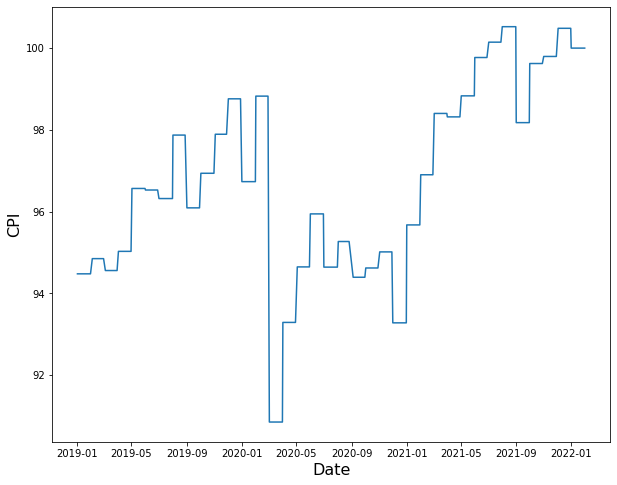

In [32]:
plt.figure(1, figsize= [10, 8])
plt.plot(data['Date'], data['CPI'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('CPI', fontsize=16)

In [10]:
#data.set_index('Date', inplace = True)
#data

Prophet Model

In [11]:
data.dtypes

Date    datetime64[ns]
CPI            float64
dtype: object

In [12]:
ds = data.Date
data.columns = ['ds', 'y']
data.head(5)

,ds,y
0,2019-01-01,94.478689
1,2019-01-01,94.478689
2,2019-01-02,94.478689
3,2019-01-04,94.478689
4,2019-01-06,94.478689


Train and fit model

In [13]:
m = Prophet(interval_width = 0.2, yearly_seasonality=True)
model = m.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecast data

In [14]:
future = m.make_future_dataframe(periods=6, freq='m')

In [15]:
forecast= m.predict(future)

In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
641,2022-03-31,101.536819,100.952760,101.429358,101.536819,101.536819,-0.364175,-0.364175,-0.364175,-0.008771,-0.008771,-0.008771,-0.355404,-0.355404,-0.355404,0.0,0.0,0.0,101.172645
642,2022-04-30,101.834048,101.690389,102.431813,101.657400,101.961552,0.237398,0.237398,0.237398,-0.057914,-0.057914,-0.057914,0.295312,0.295312,0.295312,0.0,0.0,0.0,102.071446
643,2022-05-31,102.141184,102.581098,103.696526,101.664154,102.462012,0.998536,0.998536,0.998536,0.058551,0.058551,0.058551,0.939986,0.939986,0.939986,0.0,0.0,0.0,103.139720
644,2022-06-30,102.438412,102.400903,104.275035,101.492466,103.219828,1.007063,1.007063,1.007063,-0.008771,-0.008771,-0.008771,1.015834,1.015834,1.015834,0.0,0.0,0.0,103.445476
645,2022-07-31,102.745548,102.251646,104.731728,101.287822,103.690743,0.881191,0.881191,0.881191,0.022782,0.022782,0.022782,0.858409,0.858409,0.858409,0.0,0.0,0.0,103.626739


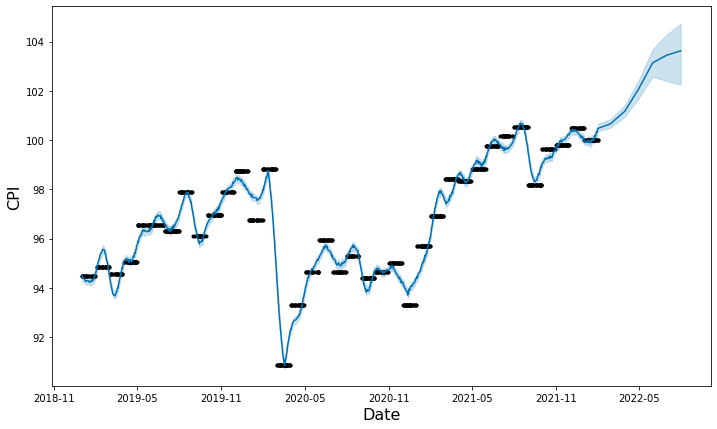

In [33]:
plot1 = m.plot(forecast)
#plt.title('CPI: Prohet Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('CPI', fontsize=16)
plt.grid(False)

In [18]:
plt2 = m.plot_components
plt2

<bound method Prophet.plot_components of <fbprophet.forecaster.Prophet object at 0x7fdb89877950>>